In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import collections

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300

import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data
#hv.extension('bokeh')
hv.extension('matplotlib')
#hv.output(size=300)

from scipy import stats

import warnings
warnings.filterwarnings('ignore')


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
# data

folder = '../data/'
fn1 = 'orit_query_data.csv'
fn2 = 'host_p4600_data-FIXED-28_8_18.csv'
fn3 = 'filtered_orit_hits.csv'
fn4 = 'dframe_microdb_human.csv'
fn5 = 'habitat_custom_groupings.csv'
fn6 = 'resfinder_p4602_results_17_6_20.tab.tsv'
fn7 = 'host_p4600_data-FIXED-28_8_18.csv'


In [3]:
def dframe_stack_list(ins,col,typ='float32'):
    df = ins.copy(deep=True)
    s = df[col].apply(lambda x: pd.Series(list(x)),1).stack().astype(typ)
    s.index = s.index.droplevel(-1)
    s.name = col
    del df[col]
    df = df.join(s)
    return df

def fix_pvals(x):
    if x < 1e-16:
        x=1e-16
    return x

def coeff_determination(y_true, y_pred):
    SS_res =  np.sum(np.square(y_true-y_pred))
    SS_tot = np.sum(np.square(y_true-np.mean(y_true)))
    return (1-SS_res/(SS_tot+1e-8))

#https://stackoverflow.com/questions/30657453/fitting-a-straight-line-to-a-log-log-curve-in-matplotlib
def powerfit(x, y, xnew):
    """line fitting on log-log scale"""
    k, m = np.polyfit(np.log(x), np.log(y), 1)
    return np.exp(m) * xnew**(k)

def fit(x, y, xnew):
    """line fitting on log-log scale"""
    k, m = np.polyfit(x, y, 1)
    return m * xnew**(k)

def plot_holoviews_chord(l):
    # prepare data for plotting
    
    # long to wide
    w = l.unstack().fillna(0)

    #encode links with nodes index
    links = (pd
             .DataFrame(l)
             .reset_index()
             .rename(columns={'Custom_group_x':'source','Custom_group_y':'target','plasmid_id':'value'})
            )
    nodes_tmp = pd.DataFrame(links.source.unique()).rename(columns={0:'name'})
    nodes = hv.Dataset(nodes_tmp, 'index')
    print(nodes_tmp.head())

    links.source = nodes_tmp.reset_index().set_index('name').loc[links.source,'index'].values
    links.target = nodes_tmp.reset_index().set_index('name').loc[links.target,'index'].values
    print(links.head())
    
    # plot bokeh
#     chord = hv.Chord((links, nodes)) #.select(value=(5, None)) -> cutoff
#     chord.opts(
#         opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(), 
#                    labels='name', node_color=dim('index').str()))

    return l, w, links, nodes

def corrfunc(x, y, **kws):
    (r, p) = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.3f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.1e}".format(fix_pvals(p)),
                xy=(.45, .9), xycoords=ax.transAxes)
    
def fix_pvals(x):
    if x < 1e-16:
        x=1e-16
    return x


## General properties

In [4]:
# load data

# nodelist
orit = pd.read_csv(folder+fn1,sep=';')
orit.reset_index(inplace=True)
orit_nodelist = orit.rename(index=str,columns={"index": "node"})
orit_nodelist['node'] = orit_nodelist['node'].values+1 

orit_nodelist.head()

# metadata
p4600 = pd.read_csv(folder+fn2,sep=';')
p4600.reset_index(inplace=True)
print(p4600.columns)


Index(['index', 'Genbank', 'Plasmid_name', 'Strain', 'Species', 'Genus',
       'Order', 'Class', 'Phylum', 'Kingdom', 'Size (bp)', 'GC contents (%)',
       'Rep typea', 'ColE1b', 'GR', 'Rep_family', 'MOBc', 'MPFc', 'T4CPd',
       'VirB4d', 'Putative transferabilitye', 'Is_Mob?', 'Mob'],
      dtype='object')


In [5]:
df4 = pd.read_csv(folder+fn3)

df4['ismob'] = p4600.set_index('Genbank').loc[df4.plasmid_id.values]['Is_Mob?'].values

# print data characteristics
print(df4.groupby('plasmid_id').query_index.count().apply(lambda x: x>1).sum())
print(df4.groupby('plasmid_id').query_index.count().apply(lambda x: x>1).sum()/
     df4.plasmid_id.unique().shape[0])

# relaxase-typed, non-typed
print(df4[df4.ismob==1].groupby('plasmid_id').query_index.count().apply(lambda x: x>1).sum()/
     df4.groupby('plasmid_id').query_index.count().apply(lambda x: x>1).sum())
print(df4[df4.ismob==0].groupby('plasmid_id').query_index.count().apply(lambda x: x>1).sum()/
     df4.groupby('plasmid_id').query_index.count().apply(lambda x: x>1).sum())

df4.head()


1331
0.6386756238003839
0.4297520661157025
0.5702479338842975


,nic_location,query_index,mob,mob_subgroup,p_value,plasmid_id,Genbank,p_cutoff,q-value,E-value,seqid,std_range,ir_size,orit_index,ismob
0,184676,14,P,6,-8.9187,NC_009926,NC_009926,-8.0,1.605789e-110,0.001188,0.7,>=mean-1std,8,0,1
1,232470,50,F,u,-8.1666,NC_009926,NC_009926,-8.0,2.264682e-97,0.006711,0.7,>=mean-1std,10,2,1
2,147650,64,Q,2,-8.1360,NC_009926,NC_009926,-8.0,2.264682e-97,0.007200,0.6,>=mean-1std,10,3,1
3,147434,69,Q,u,-9.0727,NC_009926,NC_009926,-9.0,2.264682e-97,0.000833,0.6,>=mean-1std,10,4,1
4,96517,107,V,u,-8.2723,NC_009926,NC_009926,-8.0,2.264682e-97,0.005261,0.6,>=mean-1std,8,7,1


In [6]:
# load data

# merge p4600 and hits - just mobile
tmp = p4600.drop(columns=['index','Rep typea', 'ColE1b',
                    'GR', 'Rep_family', 'MOBc', 
                    'MPFc', 'T4CPd','VirB4d', 
                    'Putative transferabilitye'])
print(tmp.shape)
#
df4600 = (df4[['plasmid_id','mob','mob_subgroup',
             'p_value','nic_location','query_index']]
          .merge(tmp,
        left_on='plasmid_id',right_on='Genbank',
        how='left')
)
df4600['mob_subgroup2'] = df4600.apply(lambda x: x.mob+x.mob_subgroup,axis=1)
print(df4600.shape)
df4600.head()

# get subset of plasmids with multiple orits
# groupby count and merge to get this inside
tmp = (df4600
       .groupby('plasmid_id')
       .mob.count()
       .reset_index()
       .rename(columns={'mob':'num_orit'})
      )
df4600 = df4600.merge(tmp,on='plasmid_id',how='left')
print(df4600.shape)
df4600.head()


(4602, 13)
(11497, 20)
(11497, 21)


,plasmid_id,mob,mob_subgroup,p_value,nic_location,query_index,Genbank,Plasmid_name,Strain,Species,...,Order,Class,Phylum,Kingdom,Size (bp),GC contents (%),Is_Mob?,Mob,mob_subgroup2,num_orit
0,NC_009926,P,6,-8.9187,184676,14,NC_009926,Acaryochloris marina MBIC11017 plasmid pREB1,Acaryochloris marina MBIC11017,Acaryochloris marina,...,Chroococcales,-,Cyanobacteria,Bacteria,374161,47.3483,1,F,P6,5
1,NC_009926,F,u,-8.1666,232470,50,NC_009926,Acaryochloris marina MBIC11017 plasmid pREB1,Acaryochloris marina MBIC11017,Acaryochloris marina,...,Chroococcales,-,Cyanobacteria,Bacteria,374161,47.3483,1,F,Fu,5
2,NC_009926,Q,2,-8.1360,147650,64,NC_009926,Acaryochloris marina MBIC11017 plasmid pREB1,Acaryochloris marina MBIC11017,Acaryochloris marina,...,Chroococcales,-,Cyanobacteria,Bacteria,374161,47.3483,1,F,Q2,5
3,NC_009926,Q,u,-9.0727,147434,69,NC_009926,Acaryochloris marina MBIC11017 plasmid pREB1,Acaryochloris marina MBIC11017,Acaryochloris marina,...,Chroococcales,-,Cyanobacteria,Bacteria,374161,47.3483,1,F,Qu,5
4,NC_009926,V,u,-8.2723,96517,107,NC_009926,Acaryochloris marina MBIC11017 plasmid pREB1,Acaryochloris marina MBIC11017,Acaryochloris marina,...,Chroococcales,-,Cyanobacteria,Bacteria,374161,47.3483,1,F,Vu,5


# Graph habitat nodes

In [7]:
# load habitat data

## Habitat data
habitat = pd.read_csv(folder+fn4).drop(columns='Unnamed: 0')
habitat.dropna(axis=0,subset=['Species'],inplace=True)
print(habitat.shape)

print(pd.DataFrame(habitat.groupby(['Supertype','Type','Subtype'])['Species','Genus']).shape)
habitat.groupby(['Supertype','Type','Subtype'])['Species','Genus'].count()

groups = (pd
          .read_csv(folder+fn5)
          .drop(columns=['Species','Genus'])
          .fillna(method='ffill')
          .rename(columns={'Custom grouping':'Custom_group'})
         )
groups.head()

habitat = habitat.merge(groups,on=['Supertype','Type','Subtype'],how='left')
print(habitat.Custom_group.unique())
print(habitat.shape)
habitat.head()


(16072, 8)
(60, 2)
['Freshwater' 'Industrial' 'Thermal' '/' 'Saline' 'Animal' 'Human' 'Soil'
 'Interface' 'Plant']
(16072, 9)


,Dataset,Genus,Pathogen,Species,Subtype,Supertype,Taxonomy,Type,Custom_group
0,microdb2018,Flavobacterium,NaN,Flavobacterium sp.,Drinking water,Non-saline,Bacteria; Bacteroidetes; Flavobacteria; Flavob...,Freshwaters,Freshwater
1,microdb2018,Pseudomonas,NaN,Pseudomonas sp.,Drinking water,Non-saline,Bacteria; Proteobacteria; Gammaproteobacteria;...,Freshwaters,Freshwater
2,microdb2018,Dysgonomonas,NaN,Dysgonomonas mossii,Drinking water,Non-saline,Bacteria; Bacteroidetes; Bacteroidia; Bacteroi...,Freshwaters,Freshwater
3,microdb2018,Staphylococcus,NaN,Staphylococcus epidermidis,Drinking water,Non-saline,Bacteria; Firmicutes; Bacilli; Bacillales; Sta...,Freshwaters,Freshwater
4,microdb2018,Mycobacterium,NaN,Mycobacterium chelonae,Drinking water,Non-saline,Bacteria; Actinobacteria; Actinobacteria ; Act...,Freshwaters,Freshwater


In [8]:
# # define group B with human pathogens

habitat['Custom_group_b'] = habitat.Custom_group
habitat.at[habitat.Custom_group == 'Human',
           'Custom_group_b'] = 'Human_commensal' 
habitat.at[(habitat.Custom_group == 'Human')&
           (habitat.Pathogen == 'Yes')
           ,'Custom_group_b'] = 'Human_pathogen' 
habitat.Custom_group_b.unique()

# drop unclassified
habitat = habitat[habitat.Custom_group!='/']

habitat.groupby(['Custom_group','Custom_group_b'])['Species','Genus'].count()


Species  Genus
Custom_group Custom_group_b                 
Animal       Animal              1453   1453
Freshwater   Freshwater          2814   2814
Human        Human_commensal     1677    917
             Human_pathogen       293    252
Industrial   Industrial          1879   1879
Interface    Interface            936    936
Plant        Plant                307    307
Saline       Saline              2084   2084
Soil         Soil                2707   2707
Thermal      Thermal              439    439

In [9]:
# How many species altogether
print(len(habitat[habitat.Custom_group!='/'].Species.unique()))
print(len(habitat[habitat.Custom_group!='/'].Genus.unique()))


3050
927


In [10]:
# add species to orit hits as merge points
df4['species_plasmid'] = (p4600
                  .set_index('Genbank')
                  .loc[df4.Genbank.values]
                  .Species
                  .values
                 )
df4['species_orit'] = (orit_nodelist
                  .set_index('node')
                  .loc[df4.query_index.values]
                  .Species
                  .values
                 )
df4.head()


,nic_location,query_index,mob,mob_subgroup,p_value,plasmid_id,Genbank,p_cutoff,q-value,E-value,seqid,std_range,ir_size,orit_index,ismob,species_plasmid,species_orit
0,184676,14,P,6,-8.9187,NC_009926,NC_009926,-8.0,1.605789e-110,0.001188,0.7,>=mean-1std,8,0,1,Acaryochloris marina,Escherichia coli
1,232470,50,F,u,-8.1666,NC_009926,NC_009926,-8.0,2.264682e-97,0.006711,0.7,>=mean-1std,10,2,1,Acaryochloris marina,Novosphingobium aromaticivorans
2,147650,64,Q,2,-8.1360,NC_009926,NC_009926,-8.0,2.264682e-97,0.007200,0.6,>=mean-1std,10,3,1,Acaryochloris marina,Mesorhizobium sp.
3,147434,69,Q,u,-9.0727,NC_009926,NC_009926,-9.0,2.264682e-97,0.000833,0.6,>=mean-1std,10,4,1,Acaryochloris marina,Bifidobacterium longum
4,96517,107,V,u,-8.2723,NC_009926,NC_009926,-8.0,2.264682e-97,0.005261,0.6,>=mean-1std,8,7,1,Acaryochloris marina,Oenococcus oeni


### Grouping A (by types)

In [11]:
# merge datasets

# plasmid habitat via species (outbound connectinos)
# orit habitat via species (inbound connections)

df4['species_plasmid'] = (p4600
                  .set_index('Genbank')
                  .loc[df4.Genbank.values]
                  .Species
                  .values
                 )
df4['species_orit'] = (orit_nodelist
                  .set_index('node')
                  .loc[df4.query_index.values]
                  .Species
                  .values
                 )

# add num orit
df4 = df4.merge(df4
                   .groupby('plasmid_id')
                   .query_index.count()
                   .reset_index()
                   .rename(columns={'query_index':'num_orit'}),
                on='plasmid_id',how='left')
df4.head()

df_habitat = (df4
                .merge(habitat[['Species','Custom_group']],
                       left_on='species_plasmid',right_on='Species',
                       how='inner')
                .merge(habitat[['Species','Custom_group']],
                       left_on='species_orit',right_on='Species',
                       how='inner')
                #.drop_duplicates()
               )
print(df_habitat.shape)
df_habitat.head()


(1447607, 22)


,nic_location,query_index,mob,mob_subgroup,p_value,plasmid_id,Genbank,p_cutoff,q-value,E-value,...,ir_size,orit_index,ismob,species_plasmid,species_orit,num_orit,Species_x,Custom_group_x,Species_y,Custom_group_y
0,1686,50,F,u,-8.3343,NC_001275,NC_001275,-8.0,1.298721e-88,0.004561,...,8,17,0,Acetobacter aceti,Novosphingobium aromaticivorans,1,Acetobacter aceti,Industrial,Novosphingobium aromaticivorans,Industrial
1,1686,50,F,u,-8.3343,NC_001275,NC_001275,-8.0,1.298721e-88,0.004561,...,8,17,0,Acetobacter aceti,Novosphingobium aromaticivorans,1,Acetobacter aceti,Industrial,Novosphingobium aromaticivorans,Interface
2,1686,50,F,u,-8.3343,NC_001275,NC_001275,-8.0,1.298721e-88,0.004561,...,8,17,0,Acetobacter aceti,Novosphingobium aromaticivorans,1,Acetobacter aceti,Industrial,Novosphingobium aromaticivorans,Soil
3,1686,50,F,u,-8.3343,NC_001275,NC_001275,-8.0,1.298721e-88,0.004561,...,8,17,0,Acetobacter aceti,Novosphingobium aromaticivorans,1,Acetobacter aceti,Industrial,Novosphingobium aromaticivorans,Freshwater
4,1686,50,F,u,-8.3343,NC_001275,NC_001275,-8.0,1.298721e-88,0.004561,...,8,17,0,Acetobacter aceti,Novosphingobium aromaticivorans,1,Acetobacter aceti,Industrial,Novosphingobium aromaticivorans,Freshwater


In [12]:
# Combine all species and calculate overall recovery

tmp = list(df4.species_plasmid.unique())
tmp.extend(list(df4.species_orit.unique()))

tmp2 = list(df_habitat.species_plasmid.unique())
tmp2.extend(list(df_habitat.species_orit.unique()))
print(np.unique(tmp2).shape[0]/np.unique(tmp).shape[0])
print(np.unique(tmp2).shape[0],np.unique(tmp).shape[0])


0.42105263157894735
224 532


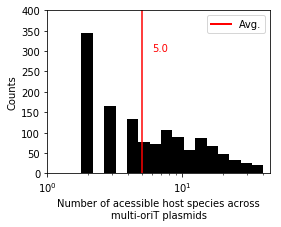

In [13]:
# species 
plt.figure(figsize=(4,3))

bmin, bmax = 1, 40
logbins = 10 ** np.linspace(np.log10(bmin), np.log10(bmax), 20)
plt.hist(df4[df4.num_orit>1].groupby('Genbank').species_plasmid.count(),
         bins=logbins, color='k')
plt.xscale('log')
# plt.hist(df4[df4.num_orit>1].groupby('Genbank').species_plasmid.count(),
#          bins=40, color='k')
plt.ylabel('Counts')
plt.xlabel('Number of acessible host species across\nmulti-oriT plasmids')
ann = df4[df4.num_orit>1].groupby('Genbank').species_plasmid.count().median()
plt.plot([ann,ann],[0,2000],'r')
plt.ylim(0,400)
plt.xlim(1,45)
plt.annotate(ann,
            xy=(6,300),color='r')
custom_lines = [Line2D([0], [0], color='r', lw=2)]
plt.legend(custom_lines,['Avg.'],loc=1)
plt.show()

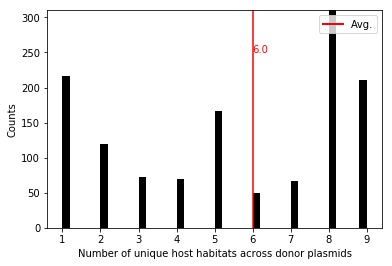

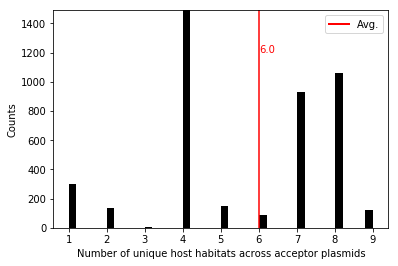

In [14]:
plt.hist((df_habitat
          .groupby('Genbank')
          .Custom_group_x
          .nunique()),
         bins=40, color='k')
plt.ylabel('Counts')
plt.xlabel('Number of unique host habitats across donor plasmids')

ann = (df_habitat
          .groupby('Genbank')
          .Custom_group_x
          .nunique()).median()
plt.plot([ann,ann],[0,2000],'r')
plt.ylim(0,310)
plt.annotate(ann,
            xy=(6,250),color='r')
custom_lines = [Line2D([0], [0], color='r', lw=2)]
plt.legend(custom_lines,['Avg.'],loc=1)

plt.show()

plt.hist((df_habitat
          .groupby('orit_index')
          .Custom_group_y
          .nunique()),
         bins=40, color='k')
plt.ylabel('Counts')
plt.xlabel('Number of unique host habitats across acceptor plasmids')

ann = (df_habitat
          .groupby('Genbank')
          .Custom_group_x
          .nunique()).median()
plt.plot([ann,ann],[0,2000],'r')
plt.ylim(0,1490)
plt.annotate(ann,
            xy=(6,1200),color='r')
custom_lines = [Line2D([0], [0], color='r', lw=2)]
plt.legend(custom_lines,['Avg.'],loc=0)

plt.show()

In [15]:
# Table

table4 = (pd.DataFrame(df_habitat
                      .groupby('Custom_group_x')
                      .species_plasmid
                      .nunique())
          .rename(columns={'species_plasmid':'num_species_out'})
         )
table4['num_species_in'] = (df_habitat
                      .groupby('Custom_group_y')
                      .species_orit
                      .nunique())
table4['num_plasmids'] = (df_habitat
                      .groupby('Custom_group_x')
                      .Genbank
                      .nunique())
table4['num_orits'] = (df_habitat
                      .groupby('Custom_group_y')
                      .orit_index
                      .nunique())
table4


,num_species_out,num_species_in,num_plasmids,num_orits
Custom_group_x,,,,
Animal,110,21,834,3692
Freshwater,117,21,925,2730
Human,124,25,1006,3119
Industrial,127,25,1034,4203
Interface,90,20,673,3642
Plant,64,13,657,1613
Saline,110,22,940,2346
Soil,133,22,1058,2852
Thermal,53,9,379,1101


In [16]:
# make an adjacency matrix

l = (df_habitat
     .groupby(['Custom_group_x','Custom_group_y'])
     .plasmid_id
     .count()
    )     
w = l.unstack().fillna(0)
w


Custom_group_y,Animal,Freshwater,Human,Industrial,Interface,Plant,Saline,Soil,Thermal
Custom_group_x,,,,,,,,,
Animal,23547,31365,30744,22701,10917,3588,18537,24503,2805
Freshwater,38005,52359,47651,37072,18326,5761,29050,40455,4702
Human,23131,30919,32802,23092,10021,3743,20376,24747,3121
Industrial,28089,38627,35644,27518,13311,4325,21491,29548,3521
Interface,12279,16122,15359,11515,6003,1800,9029,12571,1261
Plant,4823,6567,6180,4695,2288,736,3792,5139,584
Saline,29771,39870,37331,28497,14346,4434,22129,30865,3538
Soil,35581,49610,44018,34884,17626,5522,27018,38575,4137
Thermal,5956,8427,7332,5933,2846,932,4339,6330,903


In [17]:
# Count pairwise connections 

group_conn_measure = w.copy(deep=True)
group_conn_measure['Outbound'] = w.sum(axis=1)
group_conn_measure['Inbound'] = w.sum(axis=0)
group_conn_measure['Ratio_inout'] = w.sum(axis=0)/w.sum(axis=1)

gcm_a = group_conn_measure
group_conn_measure


Custom_group_y,Animal,Freshwater,Human,Industrial,Interface,Plant,Saline,Soil,Thermal,Outbound,Inbound,Ratio_inout
Custom_group_x,,,,,,,,,,,,
Animal,23547,31365,30744,22701,10917,3588,18537,24503,2805,168707,201182,1.192493
Freshwater,38005,52359,47651,37072,18326,5761,29050,40455,4702,273381,273866,1.001774
Human,23131,30919,32802,23092,10021,3743,20376,24747,3121,171952,257061,1.494958
Industrial,28089,38627,35644,27518,13311,4325,21491,29548,3521,202074,195907,0.969481
Interface,12279,16122,15359,11515,6003,1800,9029,12571,1261,85939,95684,1.113394
Plant,4823,6567,6180,4695,2288,736,3792,5139,584,34804,30841,0.886134
Saline,29771,39870,37331,28497,14346,4434,22129,30865,3538,210781,155761,0.738971
Soil,35581,49610,44018,34884,17626,5522,27018,38575,4137,256971,212733,0.827848
Thermal,5956,8427,7332,5933,2846,932,4339,6330,903,42998,24572,0.571468


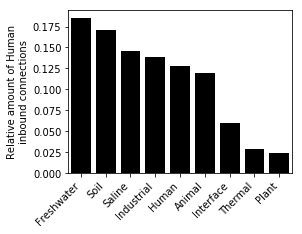

In [18]:
# relative contribution of environments to human inbound

df_plot = (group_conn_measure.Human
           .divide(group_conn_measure.Human.sum())
           .sort_values(ascending=False)
           .reset_index()
          )

plt.figure(figsize=(4,3))
sns.barplot(data=df_plot,x='Custom_group_x',
           y='Human',color='k')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Relative amount of Human\ninbound connections')
plt.xlabel('')
plt.show()


In [19]:
# Update Table4
table4['Inbound'] = group_conn_measure.Inbound
table4['Outbound'] = group_conn_measure.Outbound
table4['Ratio_inout'] = group_conn_measure['Ratio_inout']

# # Add totals
# table4_abs = table4.append(table4.sum(axis=0).astype(np.int).rename('Total'))
# table4_abs

table4


,num_species_out,num_species_in,num_plasmids,num_orits,Inbound,Outbound,Ratio_inout
Custom_group_x,,,,,,,
Animal,110,21,834,3692,201182,168707,1.192493
Freshwater,117,21,925,2730,273866,273381,1.001774
Human,124,25,1006,3119,257061,171952,1.494958
Industrial,127,25,1034,4203,195907,202074,0.969481
Interface,90,20,673,3642,95684,85939,1.113394
Plant,64,13,657,1613,30841,34804,0.886134
Saline,110,22,940,2346,155761,210781,0.738971
Soil,133,22,1058,2852,212733,256971,0.827848
Thermal,53,9,379,1101,24572,42998,0.571468


In [20]:
# Relative values
table4_rel = table4/table4.sum(axis=0)
table4_rel
#table4_rel.sum(axis=0)


,num_species_out,num_species_in,num_plasmids,num_orits,Inbound,Outbound,Ratio_inout
Custom_group_x,,,,,,,
Animal,0.118534,0.117978,0.111111,0.145940,0.138976,0.116542,0.135564
Freshwater,0.126078,0.117978,0.123235,0.107914,0.189185,0.188850,0.113883
Human,0.133621,0.140449,0.134026,0.123290,0.177577,0.118784,0.169949
Industrial,0.136853,0.140449,0.137756,0.166140,0.135332,0.139592,0.110212
Interface,0.096983,0.112360,0.089662,0.143964,0.066098,0.059366,0.126572
Plant,0.068966,0.073034,0.087530,0.063760,0.021305,0.024042,0.100737
Saline,0.118534,0.123596,0.125233,0.092735,0.107599,0.145607,0.084007
Soil,0.143319,0.123596,0.140954,0.112736,0.146955,0.177514,0.094111
Thermal,0.057112,0.050562,0.050493,0.043521,0.016974,0.029703,0.064965


In [21]:
print(table4.iloc[[0,1,3,4,5,6,7,8]].Ratio_inout.median())
print(table4.Ratio_inout.median())
print(table4.loc['Human','Ratio_inout']/table4.Ratio_inout.median())

0.9278076274046755
0.9694814770826529
1.5420180071156973


In [22]:
# plot
hv.output(size=300)

l, w, links, nodes = plot_holoviews_chord(l)
# plot bokeh
chord = hv.Chord((links, nodes)) #.select(value=(5, None)) -> cutoff
chord.opts(
    opts.Chord(cmap='Category10', edge_cmap='Category10', edge_color=dim('source').str(), 
               labels='name', node_color=dim('index').str()))

hv.save(chord, 'f3d.svg', fmt='svg')


         name
0      Animal
1  Freshwater
2       Human
3  Industrial
4   Interface
   source  target  value
0       0       0  23547
1       0       1  31365
2       0       2  30744
3       0       3  22701
4       0       4  10917


In [23]:
# Initial and recovered size of habitats
tmp1 = habitat.groupby('Custom_group').Species.nunique()

# merge unique species in recovered df_habitat
# and measure how much of original is recovered

tmp2 = pd.DataFrame(df_habitat
 .groupby('Custom_group_x')                     
 .species_plasmid                     
 .apply(tuple)
)

tmp2['species_orit'] = (df_habitat
 .groupby('Custom_group_y')                     
 .species_orit                     
 .apply(tuple)
)

(tmp2
 .apply(lambda x: len(set(x.species_plasmid+x.species_orit)),axis=1)
 .divide(tmp1)
)

# # sanity check
# (df_habitat
#           .groupby('Custom_group_x')
#           .species_plasmid
#           .nunique())

table4['perc_recovered_species'] = (tmp2
 .apply(lambda x: len(set(x.species_plasmid+x.species_orit)),axis=1)
 .divide(tmp1)
)
table4['species_initial'] = tmp1
table4['species_recovered'] = (tmp2
 .apply(lambda x: len(set(x.species_plasmid+x.species_orit)),axis=1)
                              )
table4


,num_species_out,num_species_in,num_plasmids,num_orits,Inbound,Outbound,Ratio_inout,perc_recovered_species,species_initial,species_recovered
Custom_group_x,,,,,,,,,,
Animal,110,21,834,3692,201182,168707,1.192493,0.141074,801,113
Freshwater,117,21,925,2730,273866,273381,1.001774,0.115347,1023,118
Human,124,25,1006,3119,257061,171952,1.494958,0.102008,1245,127
Industrial,127,25,1034,4203,195907,202074,0.969481,0.127490,1004,128
Interface,90,20,673,3642,95684,85939,1.113394,0.135215,673,91
Plant,64,13,657,1613,30841,34804,0.886134,0.219595,296,65
Saline,110,22,940,2346,155761,210781,0.738971,0.118393,946,112
Soil,133,22,1058,2852,212733,256971,0.827848,0.110656,1220,135
Thermal,53,9,379,1101,24572,42998,0.571468,0.151261,357,54


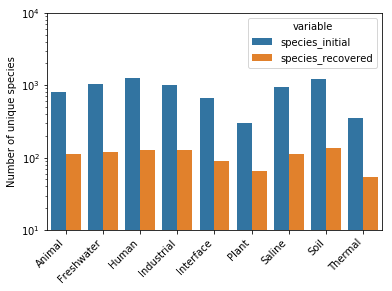

0.12749003984063745
0.10200803212851406
0.2195945945945946
946.0
296
1245
113.0
54
135


In [24]:
# Plot original sizes, recovered sizes, barplot both

# merge to long df
df_plot = pd.melt(table4.reset_index(), 
                  id_vars=['Custom_group_x'], 
                  value_vars=['species_initial', 'species_recovered'])

sns.barplot(data=df_plot,
           x='Custom_group_x',y='value',
           hue='variable')
plt.yscale('log')
plt.ylim(10,10000)
plt.xticks(rotation=45,ha='right')
plt.ylabel('Number of unique species')
plt.xlabel('')
plt.show()

print(table4.perc_recovered_species.median())
print(table4.perc_recovered_species.min())
print(table4.perc_recovered_species.max())

print(table4.species_initial.median())
print(table4.species_initial.min())
print(table4.species_initial.max())

print(table4.species_recovered.median())
print(table4.species_recovered.min())
print(table4.species_recovered.max())


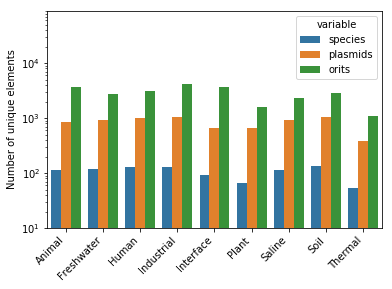

In [25]:
# merge to long df

df_plot = pd.melt(table4.reset_index().rename(columns={'species_recovered':'species',
                                                      'num_plasmids':'plasmids',
                                                      'num_orits':'orits'}), 
                  id_vars=['Custom_group_x'], 
                  value_vars=['species',
                             'plasmids',
                             'orits'])

sns.barplot(data=df_plot,
           x='Custom_group_x',y='value',
           hue='variable')
plt.yscale('log')
plt.ylim(10,90000)
plt.xticks(rotation=45,ha='right')
plt.ylabel('Number of unique elements')
plt.xlabel('')
plt.show()


2.9513513513513514


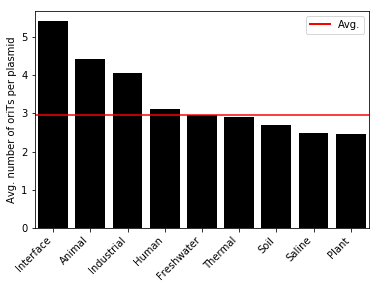

In [26]:
# num orits per plasmid

table4['num_orit_per_plasmid'] = (table4
                                  .num_orits
                                  .divide(table4
                                          .num_plasmids)
                                 )
print(table4.num_orit_per_plasmid.median())
table4

#plt.figure(figsize=(4,3))
sns.barplot(data=(table4
                  .reset_index()
                  .sort_values(by='num_orit_per_plasmid',ascending=False)),
           x='Custom_group_x',
           y='num_orit_per_plasmid',
           color='k')
ann = table4.num_orit_per_plasmid.median()
plt.plot([-1,10],[ann,ann],'r')
plt.xlim(-0.5,8.5)
plt.xticks(rotation=45,ha='right')
plt.ylabel('Avg. number of oriTs per plasmid')
plt.xlabel('')

custom_lines = [Line2D([0], [0], color='r', lw=2)]
plt.legend(custom_lines,['Avg.'],loc=0)

plt.show()


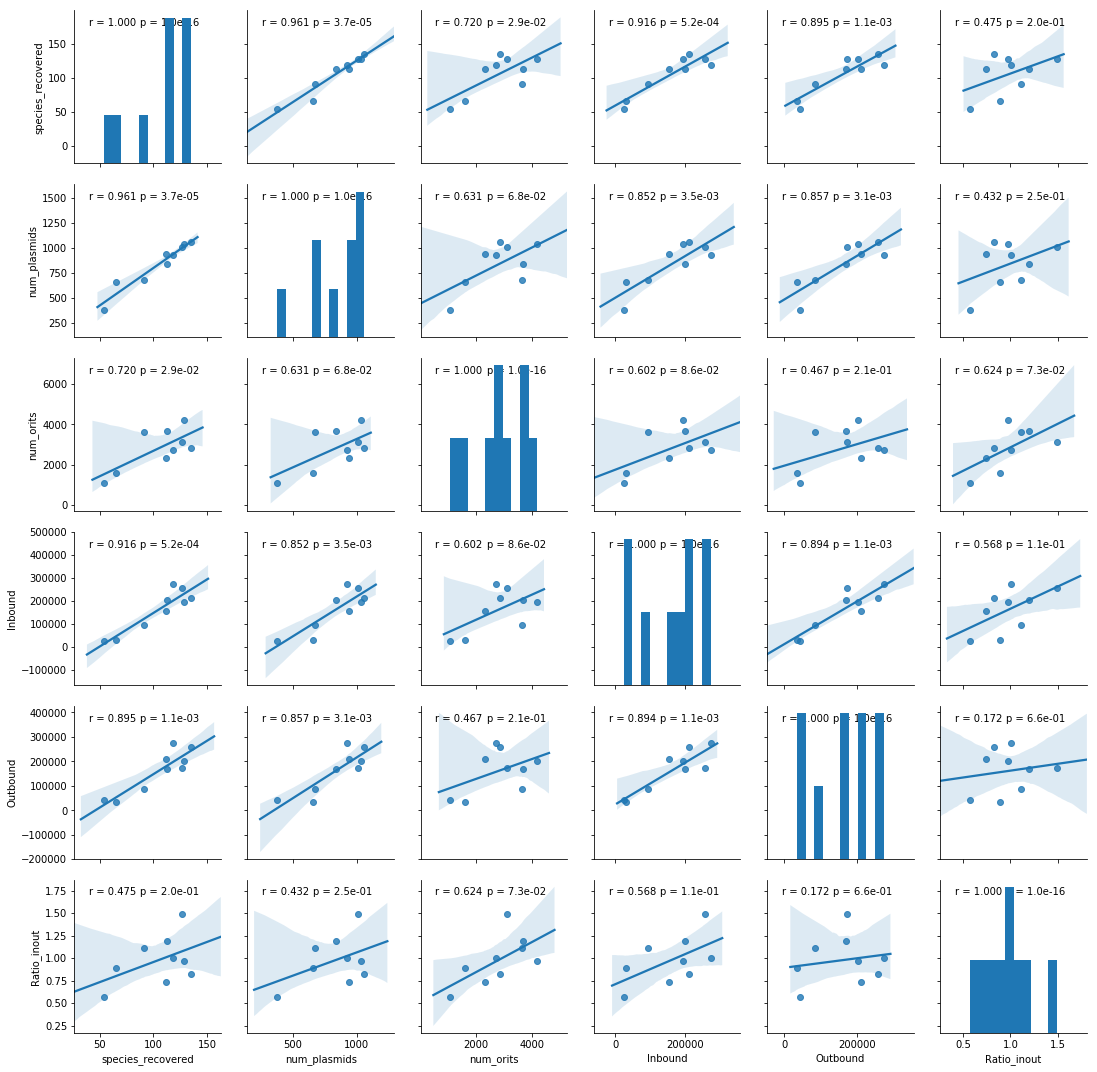

In [27]:
# Correlation analysis

g = sns.pairplot(table4[['species_recovered',
                     'num_plasmids',
                     'num_orits',  
                     'Inbound',
                     'Outbound',
                     'Ratio_inout']],
            kind="reg")
g.map(corrfunc)
plt.show()


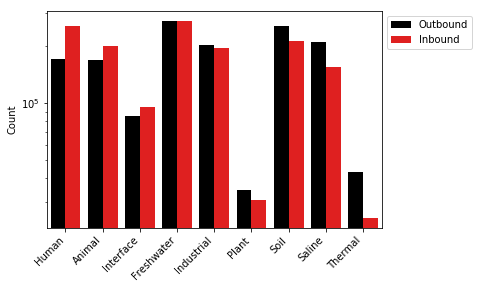

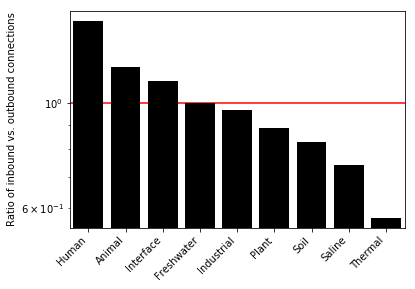

In [28]:
# Barplot relative amounts of connections

table4['Inbound_rel'] = (table4
                         .Inbound
                         .divide(table4.
                                 Inbound
                                 .sum())
                        )
table4['Outbound_rel'] = (table4
                         .Outbound
                         .divide(table4.
                                 Outbound
                                 .sum())
                         )

df_plot = pd.melt(table4.reset_index()
                  .sort_values(by='Ratio_inout',
                              ascending=False), 
                  id_vars=['Custom_group_x'], 
                  value_vars=['Outbound',
                             'Inbound'])

#plt.figure(figsize=(4,3))

sns.barplot(data=df_plot,
           x='Custom_group_x',y='value',
           hue='variable',palette=['k','r'])
plt.yscale('log')
#plt.ylim(0.01,1)
plt.xticks(rotation=45,ha='right')
plt.ylabel('Count')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

#plt.figure(figsize=(4,3))

sns.barplot(data=(table4
                  .sort_values(by='Ratio_inout',
                              ascending=False)
                  .reset_index()
                 ),
           x='Custom_group_x',y='Ratio_inout',
            color='k')
plt.plot([-1,10],[1,1],'r',zorder=0)
plt.yscale('log')
plt.xlim(-0.5,8.5)
plt.xticks(rotation=45,ha='right')
plt.ylabel('Ratio of inbound vs. outbound connections')
plt.xlabel('')

plt.show()
                          

In [29]:
table4_a = table4
table4_a

,num_species_out,num_species_in,num_plasmids,num_orits,Inbound,Outbound,Ratio_inout,perc_recovered_species,species_initial,species_recovered,num_orit_per_plasmid,Inbound_rel,Outbound_rel
Custom_group_x,,,,,,,,,,,,,
Animal,110,21,834,3692,201182,168707,1.192493,0.141074,801,113,4.426859,0.138976,0.116542
Freshwater,117,21,925,2730,273866,273381,1.001774,0.115347,1023,118,2.951351,0.189185,0.188850
Human,124,25,1006,3119,257061,171952,1.494958,0.102008,1245,127,3.100398,0.177577,0.118784
Industrial,127,25,1034,4203,195907,202074,0.969481,0.127490,1004,128,4.064797,0.135332,0.139592
Interface,90,20,673,3642,95684,85939,1.113394,0.135215,673,91,5.411590,0.066098,0.059366
Plant,64,13,657,1613,30841,34804,0.886134,0.219595,296,65,2.455099,0.021305,0.024042
Saline,110,22,940,2346,155761,210781,0.738971,0.118393,946,112,2.495745,0.107599,0.145607
Soil,133,22,1058,2852,212733,256971,0.827848,0.110656,1220,135,2.695652,0.146955,0.177514
Thermal,53,9,379,1101,24572,42998,0.571468,0.151261,357,54,2.905013,0.016974,0.029703


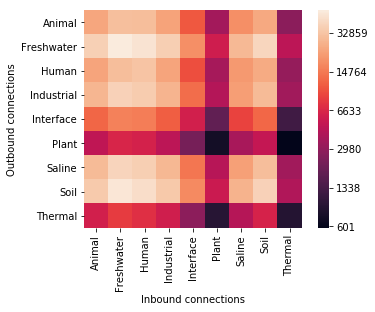

In [30]:
# adjacency plot

#f, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(w.apply(lambda x: np.log(x+1)), square=True) #vmax=15000

# Set the colorbar labels
colorbar = ax.collections[0].colorbar
ticks = [6.4,7.2,8.0,8.8,9.6,10.4]
colorbar.set_ticks(ticks)
colorbar.set_ticklabels([int(np.round(np.exp(x)-1)) for x in ticks])

plt.xlabel('Inbound connections')
plt.ylabel('Outbound connections')
plt.show()


### Grouping B (by subtypes)

(1447607, 22)
(893,)
(520,)
(220,)
0.4230769230769231
(59,)
(56,)
(35,)
0.625


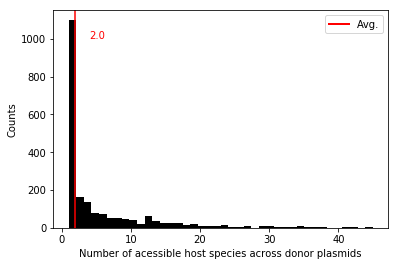

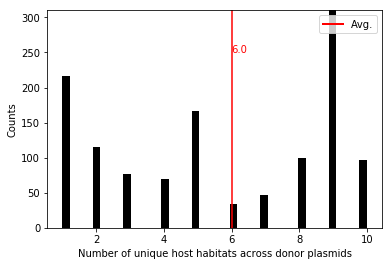

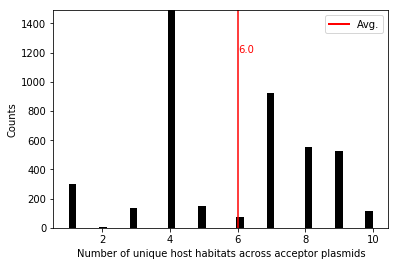

In [31]:
# merge datasets

# plasmid habitat via species (outbound connectinos)
# orit habitat via species (inbound connections)

habitat['Custom_group'] = habitat.Custom_group_b

df4['species_plasmid'] = (p4600
                  .set_index('Genbank')
                  .loc[df4.Genbank.values]
                  .Species
                  .values
                 )
df4['species_orit'] = (orit_nodelist
                  .set_index('node')
                  .loc[df4.query_index.values]
                  .Species
                  .values
                 )
df4.head()
df_habitat = (df4
                .merge(habitat[['Species','Custom_group']],
                       left_on='species_plasmid',right_on='Species',
                       how='inner')
                .merge(habitat[['Species','Custom_group']],
                       left_on='species_orit',right_on='Species',
                       how='inner')
                #.drop_duplicates()
               )
print(df_habitat.shape)
df_habitat.head()


# What are we left with
print(p4600.Species.unique().shape)
print(df4.species_plasmid.unique().shape)
print(df_habitat.species_plasmid.unique().shape)
print(df_habitat.species_plasmid.unique().shape[0]/df4.species_plasmid.unique().shape[0])

print(orit_nodelist.Species.unique().shape)
print(df4.species_orit.unique().shape)
print(df_habitat.species_orit.unique().shape)
print(df_habitat.species_orit.unique().shape[0]/df4.species_orit.unique().shape[0])

# to how much it can transfer to
plt.hist(df4.groupby('Genbank').species_plasmid.count(),
         bins=40, color='k')
plt.ylabel('Counts')
plt.xlabel('Number of acessible host species across donor plasmids')
ann = df4.groupby('Genbank').species_plasmid.count().median()
plt.plot([ann,ann],[0,2000],'r')
plt.ylim(0,1150)
plt.annotate(ann,
            xy=(4,1000),color='r')
custom_lines = [Line2D([0], [0], color='r', lw=2)]
plt.legend(custom_lines,['Avg.'],loc=1)
plt.show()

plt.hist((df_habitat
          .groupby('Genbank')
          .Custom_group_x
          .nunique()),
         bins=40, color='k')
plt.ylabel('Counts')
plt.xlabel('Number of unique host habitats across donor plasmids')

ann = (df_habitat
          .groupby('Genbank')
          .Custom_group_x
          .nunique()).median()
plt.plot([ann,ann],[0,2000],'r')
plt.ylim(0,310)
plt.annotate(ann,
            xy=(6,250),color='r')
custom_lines = [Line2D([0], [0], color='r', lw=2)]
plt.legend(custom_lines,['Avg.'],loc=1)

plt.show()

plt.hist((df_habitat
          .groupby('orit_index')
          .Custom_group_y
          .nunique()),
         bins=40, color='k')
plt.ylabel('Counts')
plt.xlabel('Number of unique host habitats across acceptor plasmids')

ann = (df_habitat
          .groupby('Genbank')
          .Custom_group_x
          .nunique()).median()
plt.plot([ann,ann],[0,2000],'r')
plt.ylim(0,1490)
plt.annotate(ann,
            xy=(6,1200),color='r')
custom_lines = [Line2D([0], [0], color='r', lw=2)]
plt.legend(custom_lines,['Avg.'],loc=0)

plt.show()


In [32]:
# Table

table4 = (pd.DataFrame(df_habitat
                      .groupby('Custom_group_x')
                      .species_plasmid
                      .nunique())
          .rename(columns={'species_plasmid':'num_species_out'})
         )
table4['num_species_in'] = (df_habitat
                      .groupby('Custom_group_y')
                      .species_orit
                      .nunique())
table4['num_plasmids'] = (df_habitat
                      .groupby('Custom_group_x')
                      .Genbank
                      .nunique())
table4['num_orits'] = (df_habitat
                      .groupby('Custom_group_y')
                      .orit_index
                      .nunique())
table4


# make an adjacency matrix
# first edgelist, is the df_habitat
l = (df_habitat
     .groupby(['Custom_group_x','Custom_group_y'])
     .plasmid_id
     .count()
    )     
w = l.unstack().fillna(0)
w


# Count pairwise connections 
group_conn_measure = w.copy(deep=True)
group_conn_measure['Outbound'] = w.sum(axis=1)
group_conn_measure['Inbound'] = w.sum(axis=0)
group_conn_measure['Ratio_inout'] = w.sum(axis=0)/w.sum(axis=1)

gcm_b = group_conn_measure
group_conn_measure

# Update Table4
table4['Inbound'] = group_conn_measure.Inbound
table4['Outbound'] = group_conn_measure.Outbound
table4['Ratio_inout'] = group_conn_measure['Ratio_inout']

# Relative values
table4_rel = table4/table4.sum(axis=0)
table4_rel
#table4_rel.sum(axis=0)

print(table4.iloc[[0,1,3,4,5,6,7,8]].Ratio_inout.median())
print(table4.Ratio_inout.median())
print(table4.loc['Human_commensal','Ratio_inout']/table4.Ratio_inout.median())
print(table4.loc['Human_pathogen','Ratio_inout']/table4.Ratio_inout.median())


0.9856277789720806
0.9856277789720806
2.002286109356055
1.126096881437553


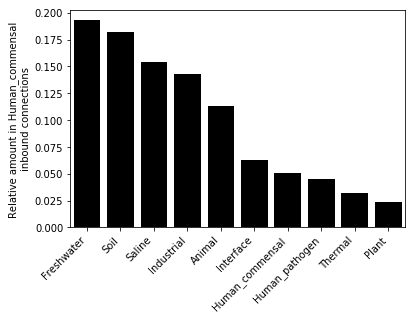

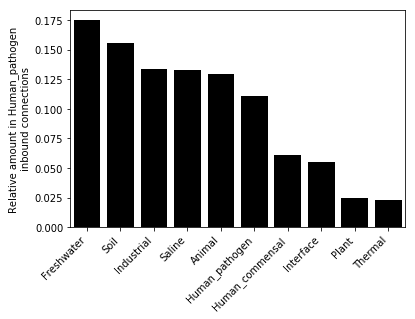

In [33]:
# relative contribution of environments to human inbound

df_plot = (group_conn_measure.Human_commensal
           .divide(group_conn_measure.Human_commensal.sum())
           .sort_values(ascending=False)
           .reset_index()
          )

#plt.figure(figsize=(4,3))
sns.barplot(data=df_plot,x='Custom_group_x',
           y='Human_commensal',color='k')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Relative amount in Human_commensal\ninbound connections')
plt.xlabel('')
plt.show()

df_plot = (group_conn_measure.Human_pathogen
           .divide(group_conn_measure.Human_pathogen.sum())
           .sort_values(ascending=False)
           .reset_index()
          )

#plt.figure(figsize=(4,3))
sns.barplot(data=df_plot,x='Custom_group_x',
           y='Human_pathogen',color='k')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Relative amount in Human_pathogen\ninbound connections')
plt.xlabel('')
plt.show()


In [34]:
# # plot

# l, w, links, nodes = plot_holoviews_chord(l)
# # plot bokeh
# chord = hv.Chord((links, nodes)) #.select(value=(5, None)) -> cutoff
# chord.opts(
#     opts.Chord(cmap='Category10', edge_cmap='Category10', edge_color=dim('source').str(), 
#                labels='name', node_color=dim('index').str()))


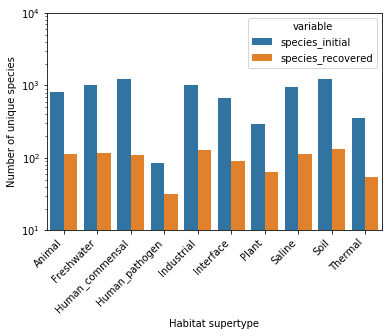

0.13135274651764411
0.09135802469135802
0.3764705882352941
873.5
85
1220
111.5
32
135


In [35]:
# Initial and recovered size of habitats
tmp1 = habitat.groupby('Custom_group').Species.nunique()

# merge unique species in recovered df_habitat
# and measure how much of original is recovered
tmp2 = pd.DataFrame(df_habitat
 .groupby('Custom_group_x')                     
 .species_plasmid                     
 .apply(tuple)
)

tmp2['species_orit'] = (df_habitat
 .groupby('Custom_group_y')                     
 .species_orit                     
 .apply(tuple)
)

(tmp2
 .apply(lambda x: len(set(x.species_plasmid+x.species_orit)),axis=1)
 .divide(tmp1)
)

table4['perc_recovered_species'] = (tmp2
 .apply(lambda x: len(set(x.species_plasmid+x.species_orit)),axis=1)
 .divide(tmp1)
)
table4['species_initial'] = tmp1
table4['species_recovered'] = (tmp2
 .apply(lambda x: len(set(x.species_plasmid+x.species_orit)),axis=1)
                              )
table4

# Plot original sizes, recovered sizes, barplot both
# merge to long df
df_plot = pd.melt(table4.reset_index(), 
                  id_vars=['Custom_group_x'], 
                  value_vars=['species_initial', 'species_recovered'])

sns.barplot(data=df_plot,
           x='Custom_group_x',y='value',
           hue='variable')
plt.yscale('log')
plt.ylim(10,10000)
plt.xticks(rotation=45,ha='right')
plt.ylabel('Number of unique species')
plt.xlabel('Habitat supertype')
plt.show()

print(table4.perc_recovered_species.median())
print(table4.perc_recovered_species.min())
print(table4.perc_recovered_species.max())

print(table4.species_initial.median())
print(table4.species_initial.min())
print(table4.species_initial.max())

print(table4.species_recovered.median())
print(table4.species_recovered.min())
print(table4.species_recovered.max())


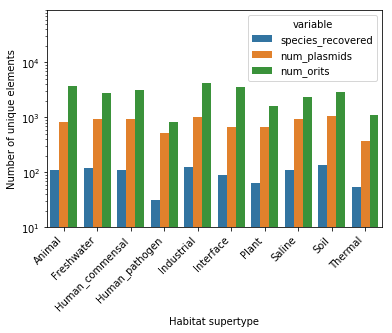

2.9281822719817443


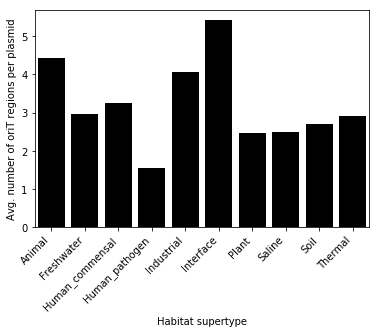

In [36]:
# merge to long df

df_plot = pd.melt(table4.reset_index(), 
                  id_vars=['Custom_group_x'], 
                  value_vars=['species_recovered',
                             'num_plasmids','num_orits'])

sns.barplot(data=df_plot,
           x='Custom_group_x',y='value',
           hue='variable')
plt.yscale('log')
plt.ylim(10,90000)
plt.xticks(rotation=45,ha='right')
plt.ylabel('Number of unique elements')
plt.xlabel('Habitat supertype')
plt.show()

# num orits per plasmid
table4['num_orit_per_plasmid'] = (table4
                                  .num_orits
                                  .divide(table4
                                          .num_plasmids)
                                 )
print(table4.num_orit_per_plasmid.median())
table4

sns.barplot(data=table4.reset_index(),
           x='Custom_group_x',
           y='num_orit_per_plasmid',
           color='k')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Avg. number of oriT regions per plasmid')
plt.xlabel('Habitat supertype')
plt.show()


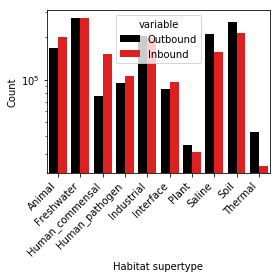

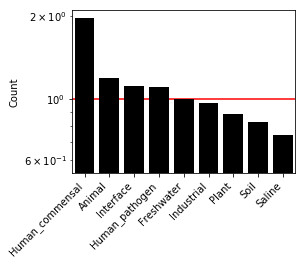

In [37]:
# Barplot relative amounts of connections

table4['Inbound_rel'] = (table4
                         .Inbound
                         .divide(table4.
                                 Inbound
                                 .sum())
                        )
table4['Outbound_rel'] = (table4
                         .Outbound
                         .divide(table4.
                                 Outbound
                                 .sum())
                         )

df_plot = pd.melt(table4.reset_index(), 
                  id_vars=['Custom_group_x'], 
                  value_vars=['Outbound',
                             'Inbound'])

plt.figure(figsize=(4,3))

sns.barplot(data=df_plot,
           x='Custom_group_x',y='value',
           hue='variable',palette=['k','r'])
plt.yscale('log')
#plt.ylim(0.01,1)
plt.xticks(rotation=45,ha='right')
plt.ylabel('Count')
plt.xlabel('Habitat supertype')
plt.show()

plt.figure(figsize=(4,3))

sns.barplot(data=(table4
                  .sort_values(by='Ratio_inout',
                              ascending=False)
                  .reset_index()
                 ),
           x='Custom_group_x',y='Ratio_inout',
            color='k')
plt.plot([-1,10],[1,1],'r',zorder=0)
plt.yscale('log')
plt.xlim(-0.5,8.5)
plt.xticks(rotation=45,ha='right')
plt.ylabel('Count')
plt.xlabel('')

plt.show()


In [38]:
table4_b = table4
table4_b

,num_species_out,num_species_in,num_plasmids,num_orits,Inbound,Outbound,Ratio_inout,perc_recovered_species,species_initial,species_recovered,num_orit_per_plasmid,Inbound_rel,Outbound_rel
Custom_group_x,,,,,,,,,,,,,
Animal,110,21,834,3692,201182,168707,1.192493,0.141074,801,113,4.426859,0.138976,0.116542
Freshwater,117,21,925,2730,273866,273381,1.001774,0.115347,1023,118,2.951351,0.189185,0.188850
Human_commensal,108,24,956,3118,151303,76667,1.973509,0.091358,1215,111,3.261506,0.104519,0.052961
Human_pathogen,31,8,522,810,105758,95285,1.109912,0.376471,85,32,1.551724,0.073057,0.065822
Industrial,127,25,1034,4203,195907,202074,0.969481,0.127490,1004,128,4.064797,0.135332,0.139592
Interface,90,20,673,3642,95684,85939,1.113394,0.135215,673,91,5.411590,0.066098,0.059366
Plant,64,13,657,1613,30841,34804,0.886134,0.219595,296,65,2.455099,0.021305,0.024042
Saline,110,22,940,2346,155761,210781,0.738971,0.118393,946,112,2.495745,0.107599,0.145607
Soil,133,22,1058,2852,212733,256971,0.827848,0.110656,1220,135,2.695652,0.146955,0.177514


### Measure within human system what is connectivity commensal - pathogen

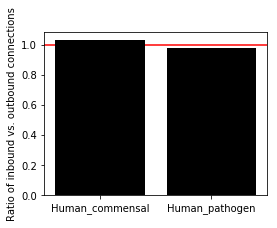

In [39]:
w_human = w.loc[['Human_commensal','Human_pathogen'],
      ['Human_commensal','Human_pathogen']]

# measure inbound/outbound
gcm_human = w_human.copy(deep=True)
gcm_human['Outbound'] = w_human.sum(axis=1)
gcm_human['Inbound'] = w_human.sum(axis=0)
gcm_human['Ratio_inout'] = w_human.sum(axis=0)/w_human.sum(axis=1)

gcm_human

plt.figure(figsize=(4,3))
sns.barplot(data=gcm_human.reset_index(),
            x='Custom_group_x',
            y='Ratio_inout',
           color='k')
plt.plot([-1,2],[1,1],'r',zorder=0)
plt.xlim(-0.5,1.5)
plt.xlabel('')
plt.ylabel('Ratio of inbound vs. outbound connections')
plt.show()

## Replot

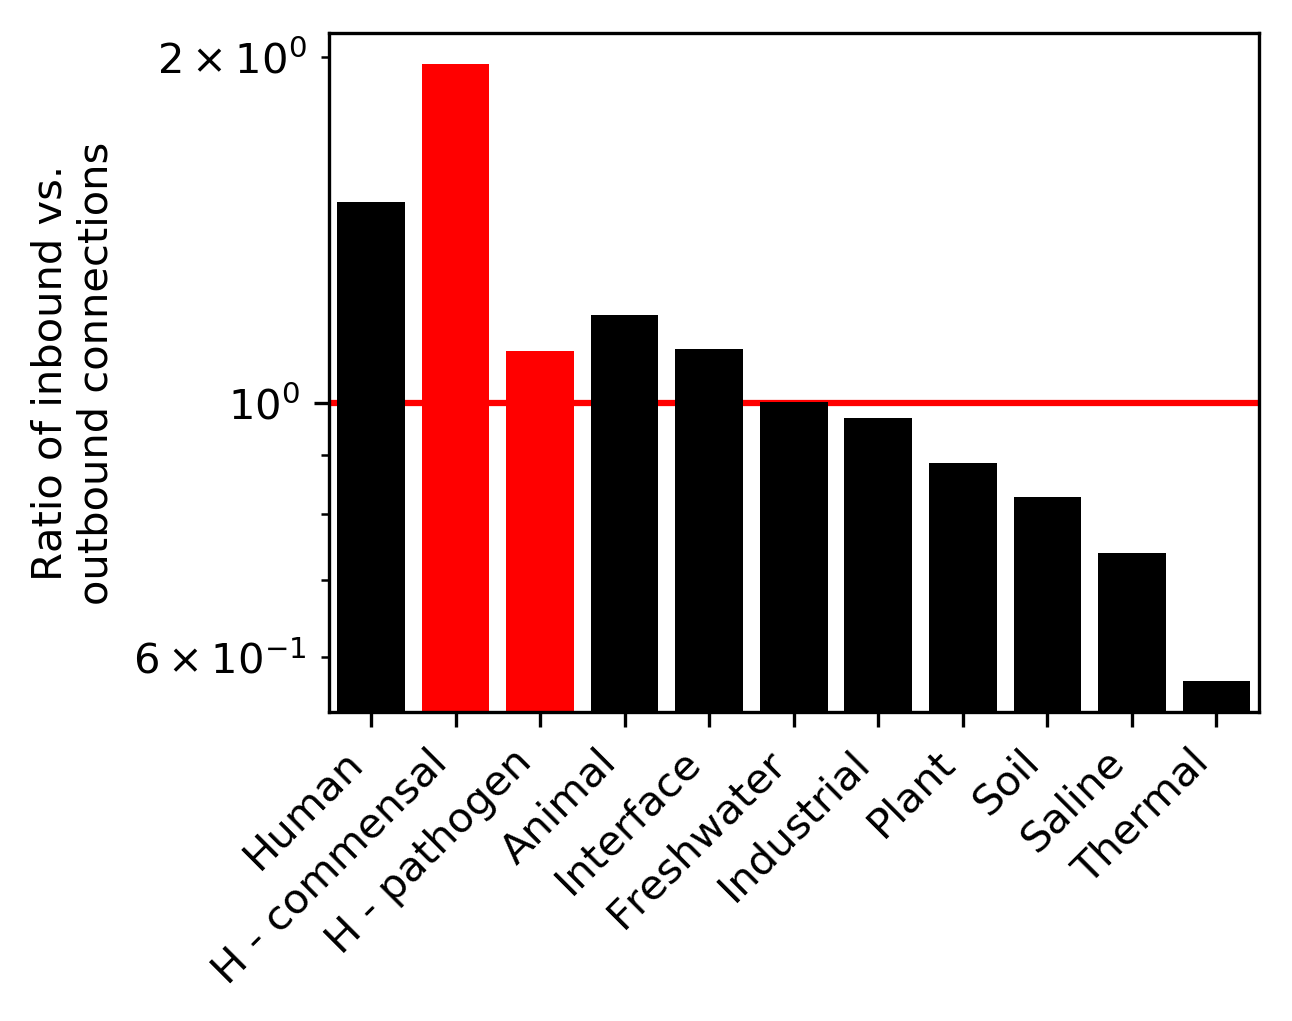

In [40]:
mpl.rcParams['figure.dpi'] = 300
plt.figure(figsize=(4,3))

sns.barplot(data=(table4_a
                  .sort_values(by='Ratio_inout',
                              ascending=False)
                  .drop(index='Human')
                  .reset_index()
                 ),
           x='Custom_group_x',y='Ratio_inout',
            color='k')

# add commensal and pathogen in front
plt.bar([-3],
        table4_a.loc['Human','Ratio_inout'],
        color='k')
plt.bar([-2],
        table4_b.loc['Human_commensal','Ratio_inout'],
        color='r')
plt.bar([0-1],
        table4_b.loc['Human_pathogen','Ratio_inout'],
        color='r')

# solve ticks
labels = ['Human',
          'H - commensal',
          'H - pathogen']
labels.extend(list(table4_a
                   .drop(index='Human')
                   .sort_values(by='Ratio_inout',ascending=False)
                   .index)
             )
plt.xticks(ticks=list(range(-3,8,1)),labels=labels)

plt.plot([-4,10],[1,1],'r',zorder=0)
plt.yscale('log')
plt.xlim(-3.5,7.5)
#plt.ylim(0.5,1.6)
#plt.gca().axes.get_yaxis().set_ticks([])
#plt.yticks([])
#plt.yticks(ticks=(6e-1,1,2e0),labels=('0.6','1','2'))
plt.xticks(rotation=45,ha='right')
plt.ylabel('Ratio of inbound vs.\noutbound connections')
plt.xlabel('')

plt.savefig('f3e.svg')
                

In [41]:
# how much more in human and others
# from median across all
print(table4_a.Ratio_inout.median())
print(table4_a.loc['Human','Ratio_inout']/table4_a.Ratio_inout.median())
print(table4_a.loc['Animal','Ratio_inout']/table4_a.Ratio_inout.median())
print(table4_a.loc['Interface','Ratio_inout']/table4_a.Ratio_inout.median())

# from median across all others but
print(table4_a.loc['Human','Ratio_inout']/table4_a.iloc[[0,1,3,4,5,6,7,8]].Ratio_inout.median())
print(table4_a.loc['Animal','Ratio_inout']/table4_a.iloc[[1,2,3,4,5,6,7,8]].Ratio_inout.median())
print(table4_a.loc['Interface','Ratio_inout']/table4_a.iloc[[0,1,2,3,5,6,7,8]].Ratio_inout.median())


0.9694814770826529
1.5420180071156973
1.2300322624286386
1.1484431737049114
1.6112800230025803
1.2852809778836967
1.2000271947573735


## AMR analysis

In [42]:
# is there correlation between amr incidence and orit num

# load plasmid data and merge
p4600 = pd.read_csv(folder+fn7,sep=';')
p4600.reset_index(inplace=True)
p4600['Contig'] = list(range(1,4603))
p4600.head()

df_arg = pd.read_csv(folder+fn6, sep='\t')
df_arg.head()

df_arg = df_arg[df_arg['Predicted phenotype']!='Warning: gene is missing from Notes file. Please inform curator.']
df_arg = df_arg[df_arg['Predicted phenotype']!='']
df_arg['Predicted phenotype'] = (df_arg['Predicted phenotype']
                                 .str
                                 .partition('resistance').apply(lambda x: ''.join(x[:2]),axis=1)
                                )

p4600 = p4600.merge(df_arg
                    .groupby('Contig')['Predicted phenotype']
                    .apply(list)
                    .reset_index()
                    .rename(columns={'Predicted phenotype':'phenotype'}),
                    on='Contig',how='left')
p4600['phenotype'] = p4600.phenotype.fillna('')

# load plasmid hits and merge that to this data
fn3 = 'filtered_orit_hits.csv'

df4 = pd.read_csv(folder+fn3)
df4['ismob'] = p4600.set_index('Genbank').loc[df4.plasmid_id.values]['Is_Mob?'].values
df4.head()

# merge p4600 and hits - just mobile
tmp = p4600.drop(columns=['index','Rep typea', 'ColE1b',
                    'GR', 'Rep_family', 'MOBc', 
                    'MPFc', 'T4CPd','VirB4d', 
                    'Putative transferabilitye'])
df4600 = (df4[['plasmid_id','mob','mob_subgroup',
             'p_value','nic_location','query_index']]
          .merge(tmp,
        left_on='plasmid_id',right_on='Genbank',
        how='left')
)
df4600['mob_subgroup2'] = df4600.apply(lambda x: x.mob+x.mob_subgroup,axis=1)
print(df4600.shape)
df4600.head()

tmp = (df4600
       .groupby('plasmid_id')
       .mob.count()
       .reset_index()
       .rename(columns={'mob':'num_orit'})
      )

p4600 = p4600.merge(tmp,
                   left_on='Genbank', 
                    right_on='plasmid_id',how='left')
p4600['num_orit'] = p4600.num_orit.fillna(0)

p4600['num_args'] = p4600.phenotype.apply(lambda x: len(x))


(11497, 22)


0.10843373493975904
0.3104902477596205
0.331
(0.4617911981927978, 2.7064764412277114e-43)


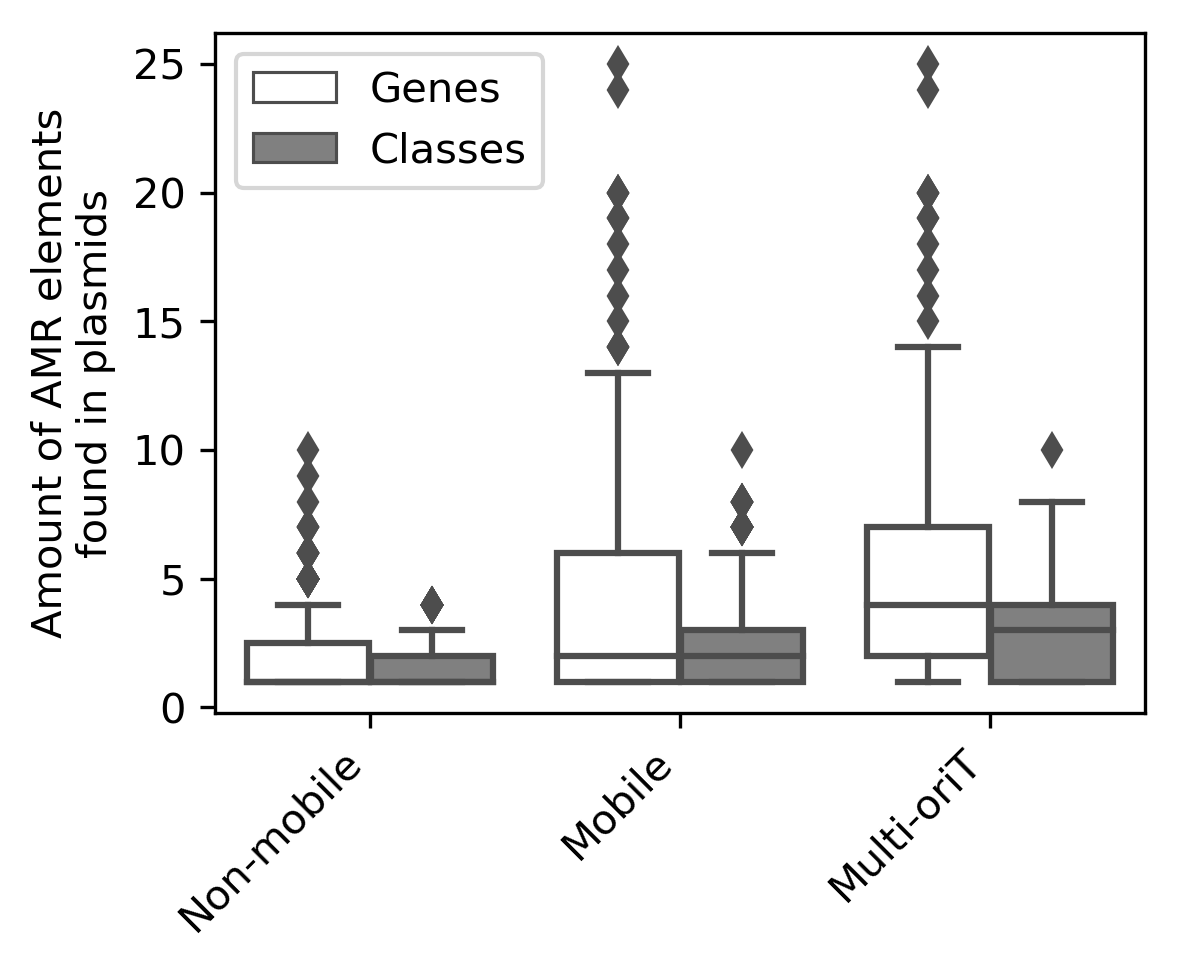

In [43]:
p4600['orit'] = p4600.num_orit.apply(lambda x: x>0)
p4600['multiorit'] = p4600.num_orit.apply(lambda x: x>1)
p4600['args'] = p4600.num_args.apply(lambda x: x>0)
p4600['mobile'] = p4600.apply(lambda x: x['Is_Mob?']|x.orit,axis=1)

# nonmobile with args
print(p4600[(p4600.mobile==0)&(p4600.args==1)].shape[0]/
      p4600[(p4600.mobile==0)&(p4600.args==0)].shape[0])

# % mobile with args
print(p4600[(p4600.mobile==1)&(p4600.args==1)].shape[0]/
      p4600[(p4600.mobile==1)&(p4600.args==0)].shape[0])

# % mutliorit with args
print(p4600[(p4600.multiorit==1)&(p4600.args==1)].shape[0]/
      p4600[(p4600.multiorit==1)&(p4600.args==0)].shape[0])

# average nume args
# average num arg classes
p4600['num_arg_class'] = p4600.phenotype.apply(lambda x: len(set(x)))

# correlation on non-mobile, mobile, multiorit
p4600['special'] = p4600.mobile
#p4600.loc[p4600.multiorit==1,'special'] = 2
#print(p4600[p4600['special']==2].shape)

tmp = p4600[p4600.multiorit==1].copy(deep=True)
tmp['special'] = 2
tmp = p4600.append(tmp)

# correlation
print(stats.pearsonr(np.log(p4600[p4600.args==1].num_orit.values+1),
                     np.log(p4600[p4600.args==1].num_args.values+1)))

# combine genes and class
plt.figure(figsize=(4,3))
ax = sns.boxplot(data=(tmp[tmp.args==1]
     .rename(columns={'num_args':'Genes','num_arg_class':'Classes'})
     .melt(id_vars=['index','special'],value_vars=['Genes','Classes'])
    ),
               x='special',y='value',
               hue='variable',palette=['white','grey'])
# for i,box in enumerate(ax.artists):
#     box.set_edgecolor('black')
#     box.set_facecolor('white')
plt.legend(title='',loc=2)
plt.xticks(ticks=(0,1,2),labels=('Non-mobile','Mobile','Multi-oriT'),
          rotation=45,ha='right')
plt.xlabel('')
plt.ylabel('Amount of AMR elements\nfound in plasmids')
plt.savefig('f3f.svg')


### via habitat data

In [44]:
# load data

# nodelist
orit = pd.read_csv(folder+fn1,sep=';')
orit.reset_index(inplace=True)
orit_nodelist = orit.rename(index=str,columns={"index": "node"})
orit_nodelist['node'] = orit_nodelist['node'].values+1 
orit_nodelist.head()

# metadata
p4600 = pd.read_csv(folder+fn7,sep=';')
p4600.reset_index(inplace=True)
p4600['Contig'] = list(range(1,4603))
print(p4600.columns)

# load res data
df_arg = pd.read_csv(folder+fn6, sep='\t')
df_arg.head()

df_arg = df_arg[df_arg['Predicted phenotype']!='Warning: gene is missing from Notes file. Please inform curator.']
df_arg = df_arg[df_arg['Predicted phenotype']!='']
df_arg['Predicted phenotype'] = (df_arg['Predicted phenotype']
                                 .str
                                 .partition('resistance').apply(lambda x: ''.join(x[:2]),axis=1)
                                )

p4600 = p4600.merge(df_arg
                    .groupby('Contig')['Predicted phenotype']
                    .apply(list)
                    .reset_index()
                    .rename(columns={'Predicted phenotype':'phenotype'}),
                    on='Contig',how='left')
p4600['phenotype'] = p4600.phenotype.fillna('')
p4600['num_args'] = p4600.phenotype.apply(lambda x: len(x))

df4 = pd.read_csv(folder+fn3)

df4['ismob'] = p4600.set_index('Genbank').loc[df4.plasmid_id.values]['Is_Mob?'].values

# print data characteristics
print(df4.groupby('plasmid_id').query_index.count().apply(lambda x: x>1).sum())
print(df4.groupby('plasmid_id').query_index.count().apply(lambda x: x>1).sum()/
     df4.plasmid_id.unique().shape[0])

# relaxase-typed, non-typed
print(df4[df4.ismob==1].groupby('plasmid_id').query_index.count().apply(lambda x: x>1).sum()/
     df4.groupby('plasmid_id').query_index.count().apply(lambda x: x>1).sum())
print(df4[df4.ismob==0].groupby('plasmid_id').query_index.count().apply(lambda x: x>1).sum()/
     df4.groupby('plasmid_id').query_index.count().apply(lambda x: x>1).sum())

df4.head()

# merge p4600 and hits - just mobile
tmp = p4600.drop(columns=['index','Rep typea', 'ColE1b',
                    'GR', 'Rep_family', 'MOBc', 
                    'MPFc', 'T4CPd','VirB4d', 
                    'Putative transferabilitye'])
print(tmp.shape)
#
df4600 = (df4[['plasmid_id','mob','mob_subgroup',
             'p_value','nic_location','query_index']]
          .merge(tmp,
        left_on='plasmid_id',right_on='Genbank',
        how='left')
)
df4600['mob_subgroup2'] = df4600.apply(lambda x: x.mob+x.mob_subgroup,axis=1)
print(df4600.shape)
df4600.head()

# get subset of plasmids with multiple orits
# groupby count and merge to get this inside
tmp = (df4600
       .groupby('plasmid_id')
       .mob.count()
       .reset_index()
       .rename(columns={'mob':'num_orit'})
      )

p4600 = p4600.merge(tmp,
                   left_on='Genbank', 
                    right_on='plasmid_id',how='left')
p4600['num_orit'] = p4600.num_orit.fillna(0)

df4600 = df4600.merge(tmp,on='plasmid_id',how='left')
print(df4600.shape)
df4600.head()


Index(['index', 'Genbank', 'Plasmid_name', 'Strain', 'Species', 'Genus',
       'Order', 'Class', 'Phylum', 'Kingdom', 'Size (bp)', 'GC contents (%)',
       'Rep typea', 'ColE1b', 'GR', 'Rep_family', 'MOBc', 'MPFc', 'T4CPd',
       'VirB4d', 'Putative transferabilitye', 'Is_Mob?', 'Mob', 'Contig'],
      dtype='object')
1331
0.6386756238003839
0.4297520661157025
0.5702479338842975
(4602, 16)
(11497, 23)
(11497, 24)


,plasmid_id,mob,mob_subgroup,p_value,nic_location,query_index,Genbank,Plasmid_name,Strain,Species,...,Kingdom,Size (bp),GC contents (%),Is_Mob?,Mob,Contig,phenotype,num_args,mob_subgroup2,num_orit
0,NC_009926,P,6,-8.9187,184676,14,NC_009926,Acaryochloris marina MBIC11017 plasmid pREB1,Acaryochloris marina MBIC11017,Acaryochloris marina,...,Bacteria,374161,47.3483,1,F,2,,0,P6,5
1,NC_009926,F,u,-8.1666,232470,50,NC_009926,Acaryochloris marina MBIC11017 plasmid pREB1,Acaryochloris marina MBIC11017,Acaryochloris marina,...,Bacteria,374161,47.3483,1,F,2,,0,Fu,5
2,NC_009926,Q,2,-8.1360,147650,64,NC_009926,Acaryochloris marina MBIC11017 plasmid pREB1,Acaryochloris marina MBIC11017,Acaryochloris marina,...,Bacteria,374161,47.3483,1,F,2,,0,Q2,5
3,NC_009926,Q,u,-9.0727,147434,69,NC_009926,Acaryochloris marina MBIC11017 plasmid pREB1,Acaryochloris marina MBIC11017,Acaryochloris marina,...,Bacteria,374161,47.3483,1,F,2,,0,Qu,5
4,NC_009926,V,u,-8.2723,96517,107,NC_009926,Acaryochloris marina MBIC11017 plasmid pREB1,Acaryochloris marina MBIC11017,Acaryochloris marina,...,Bacteria,374161,47.3483,1,F,2,,0,Vu,5


In [45]:
# load habitat data

## Habitat data
habitat = pd.read_csv(folder+fn4).drop(columns='Unnamed: 0')
habitat.dropna(axis=0,subset=['Species'],inplace=True)
print(habitat.shape)

print(pd.DataFrame(habitat.groupby(['Supertype','Type','Subtype'])['Species','Genus']).shape)
habitat.groupby(['Supertype','Type','Subtype'])['Species','Genus'].count()

groups = (pd
          .read_csv(folder+fn5)
          .drop(columns=['Species','Genus'])
          .fillna(method='ffill')
          .rename(columns={'Custom grouping':'Custom_group'})
         )
groups.head()

habitat = habitat.merge(groups,on=['Supertype','Type','Subtype'],how='left')
print(habitat.Custom_group.unique())
print(habitat.shape)
habitat.head()

# # define group B with human pathogens
habitat['Custom_group_b'] = habitat.Custom_group
habitat.at[habitat.Custom_group == 'Human',
           'Custom_group_b'] = 'Human_commensal' 
habitat.at[(habitat.Custom_group == 'Human')&
           (habitat.Pathogen == 'Yes')
           ,'Custom_group_b'] = 'Human_pathogen' 
habitat.Custom_group_b.unique()

# drop unclassified
habitat = habitat[habitat.Custom_group!='/']

habitat.groupby(['Custom_group','Custom_group_b'])['Species','Genus'].count()


(16072, 8)
(60, 2)
['Freshwater' 'Industrial' 'Thermal' '/' 'Saline' 'Animal' 'Human' 'Soil'
 'Interface' 'Plant']
(16072, 9)


Species  Genus
Custom_group Custom_group_b                 
Animal       Animal              1453   1453
Freshwater   Freshwater          2814   2814
Human        Human_commensal     1677    917
             Human_pathogen       293    252
Industrial   Industrial          1879   1879
Interface    Interface            936    936
Plant        Plant                307    307
Saline       Saline              2084   2084
Soil         Soil                2707   2707
Thermal      Thermal              439    439

In [46]:
# merge datasets

# plasmid habitat via species (outbound connectinos)
# orit habitat via species (inbound connections)

habitat['Custom_group'] = habitat.Custom_group_b

df4600['species_plasmid'] = (p4600
                  .set_index('Genbank')
                  .loc[df4.Genbank.values]
                  .Species
                  .values
                 )
df4600['species_orit'] = (orit_nodelist
                  .set_index('node')
                  .loc[df4.query_index.values]
                  .Species
                  .values
                 )
df4600.head()
df_habitat = (df4600
                .merge(habitat[['Species','Custom_group']],
                       left_on='species_plasmid',right_on='Species',
                       how='inner')
                .merge(habitat[['Species','Custom_group']],
                       left_on='species_orit',right_on='Species',
                       how='inner')
                #.drop_duplicates()
               )
print(df_habitat.shape)
df_habitat.head()

# parse to get whole subset connected to human (commensal and pathogen)
# acceptor Custom_group_y = human 
# donor = all else
tmp = df_habitat[df_habitat.Custom_group_y.isin(['Human_commensal','Human_pathogen'])]
tmp = tmp[tmp.Custom_group_x.isin(['Industrial', 'Soil', 'Freshwater', 'Saline', 'Animal', 'Thermal',
       'Plant', 'Interface'])]
tmp = tmp[tmp.num_args>0]
tmp = tmp[['plasmid_id','mob','mob_subgroup','phenotype','num_args','Custom_group_x','Custom_group_y']]
print(tmp.shape)

# unlist
df_plot = dframe_stack_list(tmp,'phenotype',typ='str')
print(df_plot.shape)
df_plot.head()


(1447607, 30)
(69549, 7)
(198858, 7)


,plasmid_id,mob,mob_subgroup,num_args,Custom_group_x,Custom_group_y,phenotype
310321,NZ_AFDA02000009,Q,u,5,Industrial,Human_commensal,Aminoglycoside resistance
310321,NZ_AFDA02000009,Q,u,5,Industrial,Human_commensal,Aminoglycoside resistance
310321,NZ_AFDA02000009,Q,u,5,Industrial,Human_commensal,Aminoglycoside resistance
310321,NZ_AFDA02000009,Q,u,5,Industrial,Human_commensal,Aminoglycoside resistance
310321,NZ_AFDA02000009,Q,u,5,Industrial,Human_commensal,Sulphonamide resistance


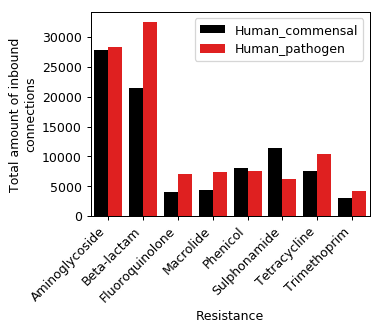

1.1966948721914146


In [47]:
# plot

data = (df_plot
 .groupby(['phenotype','Custom_group_y'])
 .plasmid_id
 .count()
 .reset_index()
)
data['Resistance'] = data.phenotype.apply(lambda x: x.split(' ')[0])
data

mpl.rcParams['figure.dpi'] = 90
plt.figure(figsize=(4,3))
sns.barplot(data=data[data.plasmid_id>2000],
            x='Resistance',y='plasmid_id',
            hue='Custom_group_y',
            palette=['k','r'])
plt.xticks(rotation=45,ha='right')
plt.ylabel('Total amount of inbound\nconnections')
#plt.xlabel('')
plt.legend(title='')
plt.show()

print(data[data['Custom_group_y']=='Human_pathogen'].plasmid_id.sum()/
data[data['Custom_group_y']=='Human_commensal'].plasmid_id.sum())
